,text,sentiment
0,I love this product,positive
1,This is the worst purchase I made,negative
2,Excellent quality and fast delivery,positive
3,Not worth the money,negative
4,Totally satisfied with my experience,positive


,cleaned_review,sentiment,label
0,i love this product,positive,1
1,this is the worst purchase i made,negative,0
2,excellent quality and fast delivery,positive,1
3,not worth the money,negative,0
4,totally satisfied with my experience,positive,1


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



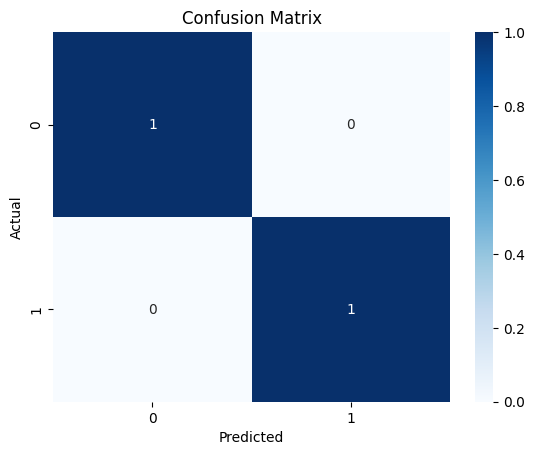

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df = pd.read_csv('/content/sample_data/sentiment.csv')

# Check the first few rows
display(df.head())
import re
import string
from sklearn.preprocessing import LabelEncoder

# Basic text cleaning function
def clean_text(text):
    if not isinstance(text, str): # Handle potential non-string data
        return ""
    text = text.lower()                                # lowercase
    text = re.sub(r'\d+', '', text)                    # remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = text.strip()                                # remove whitespace
    return text

# Apply cleaning
df['cleaned_review'] = df['text'].apply(clean_text)

# The new dataset has numerical ratings, let's create a binary sentiment label
df['sentiment'] = df['sentiment'].apply(lambda x: 'positive' if x == 'positive' else ('negative' if x == 'negative' else 'neutral'))
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])

display(df[['cleaned_review', 'sentiment', 'label']].head())
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['cleaned_review']).toarray()
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()